
# HR Analytics

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Data Exploration</a></li>
<li><a href="#model">Model Development and Evaluation</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset contains records of employees in an organisation with features detailing Age, Gender, Marital status, Monthly income, Education, JobRole, etc. This project focuses on exploring relationsgips between variables, developing a predictive model and investigating which features are the most significant.

In [1]:
# import useful libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
% matplotlib inline

# set general style of plots in this report
sns.set(style = "whitegrid")

In [2]:
df = pd.read_csv('HR_Analytics.csv')
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [4]:
df.shape

(1480, 38)

In [5]:
df.duplicated().sum()

7

In [6]:
df = df.drop_duplicates()

In [7]:
# Handle missing values
df['YearsWithCurrManager'] =df['YearsWithCurrManager'].fillna(df['YearsWithCurrManager'].median());

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.0,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,...,1473.000000,1473.0,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,36.917176,802.659878,9.196877,2.911066,1.0,1026.975560,2.723693,65.833673,2.729803,2.063815,...,2.712152,80.0,0.793618,11.277665,2.800407,2.761711,7.004752,4.228106,2.183978,4.073999
std,9.130690,403.245460,8.107754,1.024612,0.0,603.223162,1.093006,20.350032,0.712115,1.106429,...,1.081575,0.0,0.851493,7.776228,1.289411,0.705838,6.121004,3.621096,3.220301,3.496401
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,492.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1024.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1558.000000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<a id='eda'></a>
## Data Exploration


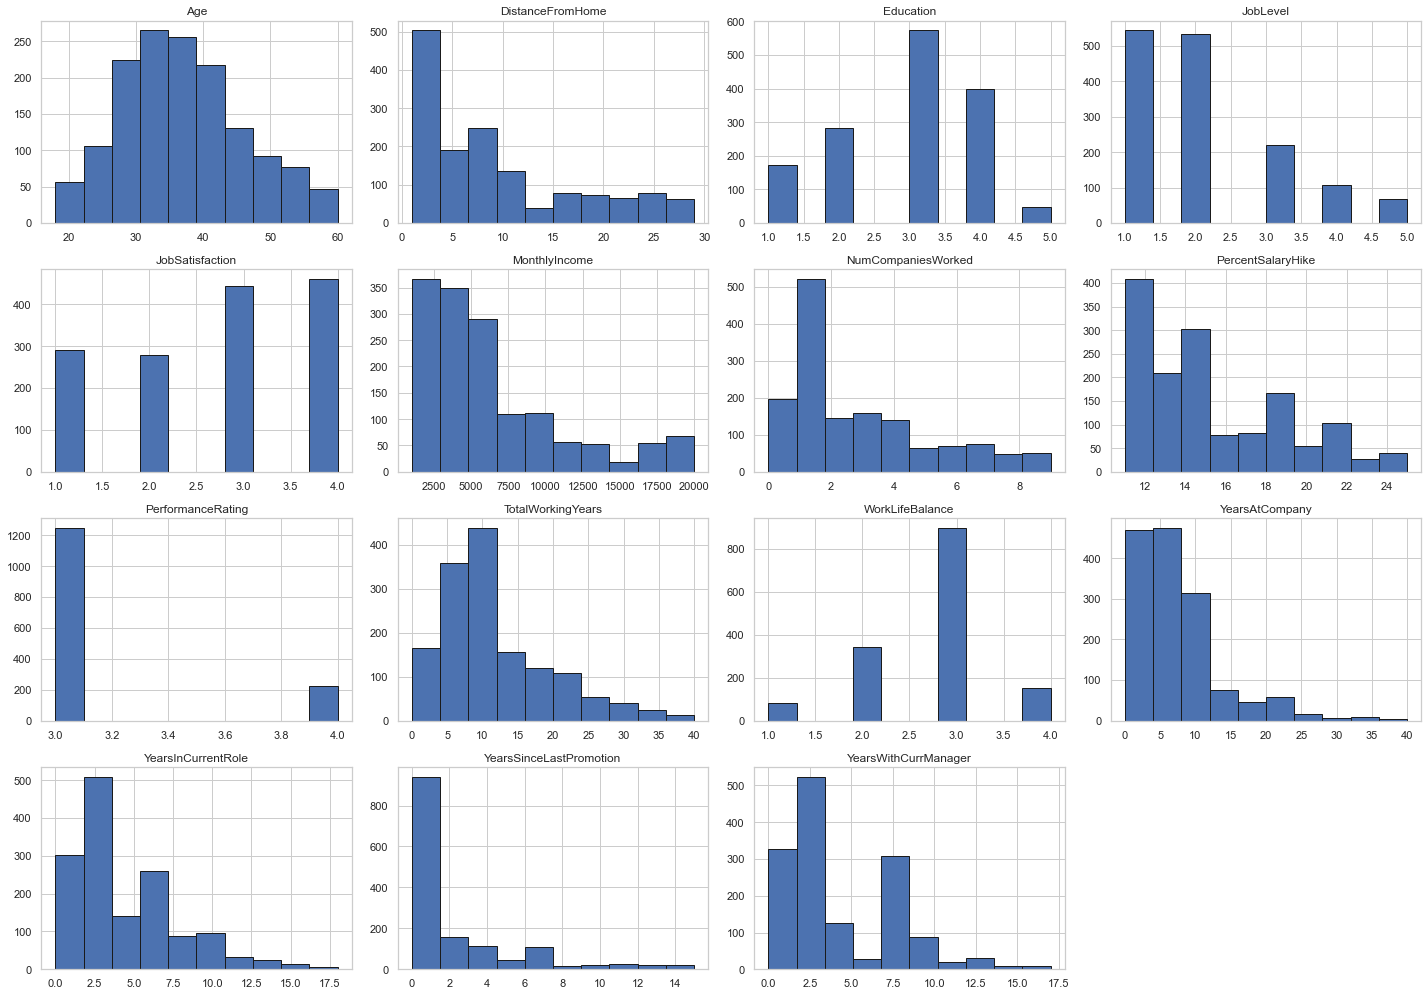

In [10]:
hist_df = df[['Age','DistanceFromHome','Education','JobLevel','JobSatisfaction','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
hist_df.hist(figsize=(20,14), ec='k');
plt.tight_layout();

From the plot above, the following can be deduced:

- Age field shows a bell-shaped, normal distribution with a peak concentration between 30 and 40 years. 

- Distance from Home exhibits a positively skewed distribution, indicating a greater concentration of employees residing within close proximity to the workplace. 

- Assuming education levels are denoted as follows:
   Primary School - 1

   Secondary School -2

   Bachelor's - 3

   Master's - 4 

   Doctoral - 5,

  the distribution reveals a strong emphasis on higher education, with a majority holding bachelor's or master's degrees. This  signifies a highly educated workforce.


- The JobLevel field shows a concentration within levels 1 and 2, suggesting a focus on entry-to-mid-level positions. This aligns with the observed distribution of total working years (majority with 10 years of experience or less), as many employees likely fall within the early to middle stages of their careers.

- Monthly Income reflects a distribution skewed towards lower income ranges, aligning with the higher proportions of employees in lower job levels. 

- Performance Rating alternates primarily between three and four, indicating a generally satisfactory level of performance across the workforce. 

- Work-Life Balance shows a neutral response of three.

- Fewer employees have been in the job role more than ten years. This raises the issue of employee retention.

- Majority had a promotion at most a year ago.





Having established that the age distribution of the employees range from 18 to 60 years with a mean of 37 years, let's explore other demographics like Gender, MaritalStatus.

In [12]:
def plot_demo(col, hue=None): 
    sns.countplot(data = df, x=col, hue = hue, color='blue');
    plt.title(f'Count of Employees by {col}', fontsize=18);
    plt.ylabel('No. of Employees');

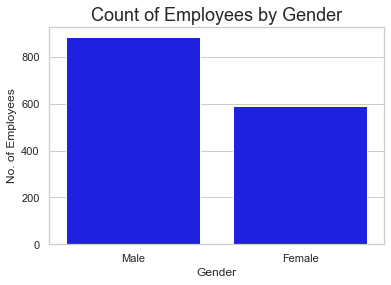

In [13]:
plot_demo('Gender')

There are more males than females.

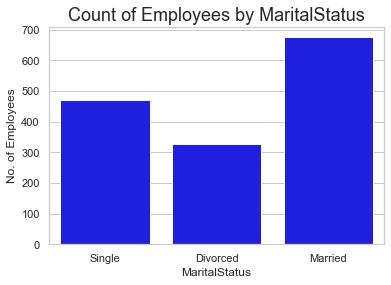

In [14]:
plot_demo('MaritalStatus')

There are more married employees than single or divorced.

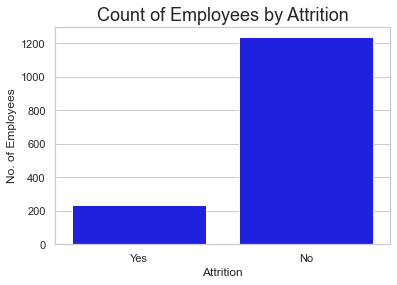

In [15]:
plot_demo('Attrition');

In [16]:
df[df['Attrition']=='Yes'].shape[0]/len(df)*100

16.08961303462322

The attriton rate is about 16%. This may not seem much but every company endeavours to ensure it remains low or even lower in order to promote employee retention and loyalty. 

We will consider some factors that may affect attrition rate and see the relationship between these factors.

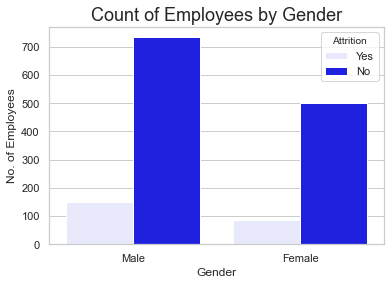

In [17]:
plot_demo('Gender', hue='Attrition')

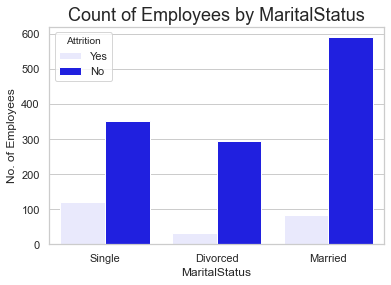

In [18]:
plot_demo('MaritalStatus', hue='Attrition')

Despite the company having more married persons, single employees left the company more than married/divorced employees.

In [19]:
df.groupby("Attrition")["Department"].value_counts()#.head(5).plot(kind="bar", color = "blue", figsize=(20,6));

Attrition  Department            
No         Research & Development    830
           Sales                     355
           Human Resources            51
Yes        Research & Development    133
           Sales                      92
           Human Resources            12
Name: Department, dtype: int64

In [20]:
df.groupby("Attrition")["JobRole"].value_counts()

Attrition  JobRole                  
No         Sales Executive              269
           Research Scientist           245
           Laboratory Technician        198
           Manufacturing Director       135
           Healthcare Representative    123
           Manager                       97
           Research Director             78
           Sales Representative          51
           Human Resources               40
Yes        Laboratory Technician         62
           Sales Executive               57
           Research Scientist            47
           Sales Representative          33
           Human Resources               12
           Manufacturing Director        10
           Healthcare Representative      9
           Manager                        5
           Research Director              2
Name: JobRole, dtype: int64

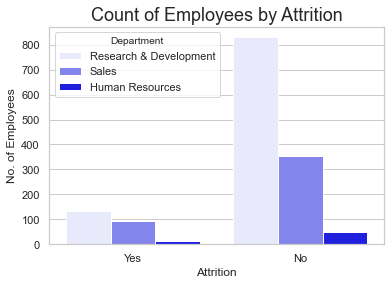

In [21]:
plot_demo('Attrition',hue='Department')

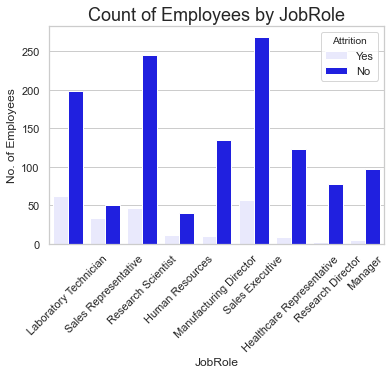

In [22]:
plot_demo('JobRole',hue='Attrition')
plt.xticks(rotation=45);

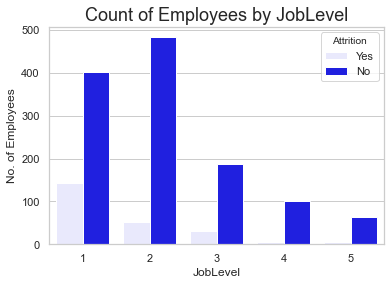

In [23]:
plot_demo('JobLevel',hue='Attrition')

A greater percentage of employees that left are in level one. 

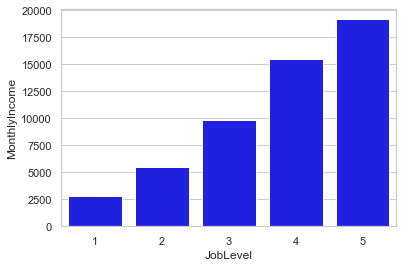

In [24]:
sns.barplot(data=df, x= 'JobLevel', y='MonthlyIncome', color='blue', ci=None);

<a id='model'></a>
## Model Development and Evaluation

In [25]:
df = df.drop(['Over18', 'OverTime', 'SalarySlab'], axis=1)

In [26]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [29]:
# Feature selection and model training
X = df.drop(['EmpID', 'Attrition'], axis=1)
y = df['Attrition']

In [30]:
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train);

RandomForestClassifier(random_state=42)

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [34]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8745762711864407


The model performs well with 87.457% accuracy

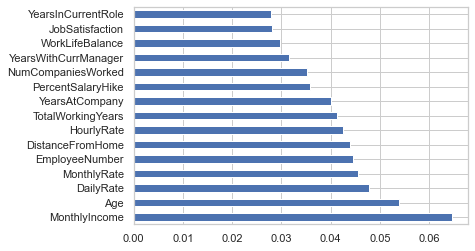

In [36]:
# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(15).plot(kind='barh')

This shows that the features above have the most significant impact on attrition rate according to the model.